<a href="https://colab.research.google.com/github/irfan2543/DataScienceMachineLearning/blob/main/Soal_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analisis Penjualan dengan Machine Learning

Memakai dataset dari soal nomor 2

####Pemahaman data

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Memanggil Data dari Upload File
from google.colab import files
upload_files = files.upload()

Saving Superstore_new.csv to Superstore_new.csv


In [ ]:
# Convert excel ke dataframe
df_super = pd.read_csv('/content/Superstore_new.csv')

#Memperlihatkan 5 data pertama
df_super.head(5)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment Customer
0,0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Segment High
1,1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Segment High
2,2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Segment Low
3,3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Segment High
4,4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Segment Low


In [ ]:
# Mengidentifikasi Atribut
attributes = df_super.columns
print("Atribut (Kolom) yang ada:")
for attr in attributes:
    print(attr)

Atribut (Kolom) yang ada:
Unnamed: 0
Row ID
Order ID
Order Date
Ship Date
Ship Mode
Customer ID
Customer Name
Segment
Country
City
State
Postal Code
Region
Product ID
Category
Sub-Category
Product Name
Sales
Quantity
Discount
Profit
Segment Customer


In [ ]:
# Pemahaman Tipe Data Python
data_types = df_super.dtypes
print("Tipe data Python untuk setiap atribut:")
print(data_types)

Tipe data Python untuk setiap atribut:
Unnamed: 0            int64
Row ID                int64
Order ID             object
Order Date           object
Ship Date            object
Ship Mode            object
Customer ID          object
Customer Name        object
Segment              object
Country              object
City                 object
State                object
Postal Code           int64
Region               object
Product ID           object
Category             object
Sub-Category         object
Product Name         object
Sales               float64
Quantity              int64
Discount            float64
Profit              float64
Segment Customer     object
dtype: object


In [ ]:
# Informasi Umum tentang Dataset
df_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9994 non-null   int64  
 1   Row ID            9994 non-null   int64  
 2   Order ID          9994 non-null   object 
 3   Order Date        9994 non-null   object 
 4   Ship Date         9994 non-null   object 
 5   Ship Mode         9994 non-null   object 
 6   Customer ID       9994 non-null   object 
 7   Customer Name     9994 non-null   object 
 8   Segment           9994 non-null   object 
 9   Country           9994 non-null   object 
 10  City              9994 non-null   object 
 11  State             9994 non-null   object 
 12  Postal Code       9994 non-null   int64  
 13  Region            9994 non-null   object 
 14  Product ID        9994 non-null   object 
 15  Category          9994 non-null   object 
 16  Sub-Category      9994 non-null   object 


In [ ]:
# Statistik Deskriptif
df_super.describe()

,Unnamed: 0,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4996.500000,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,0.000000,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2498.250000,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4996.500000,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7494.750000,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9993.000000,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


####Preprocessing Data

In [ ]:
# Cek Missing Value
df_super.isna().sum()

Unnamed: 0          0
Row ID              0
Order ID            0
Order Date          0
Ship Date           0
Ship Mode           0
Customer ID         0
Customer Name       0
Segment             0
Country             0
City                0
State               0
Postal Code         0
Region              0
Product ID          0
Category            0
Sub-Category        0
Product Name        0
Sales               0
Quantity            0
Discount            0
Profit              0
Segment Customer    0
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7d4cb3f92d40>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4cb3f93280>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4cb3f92aa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4cb3f937c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4cb3f93a60>],
 'means': []}

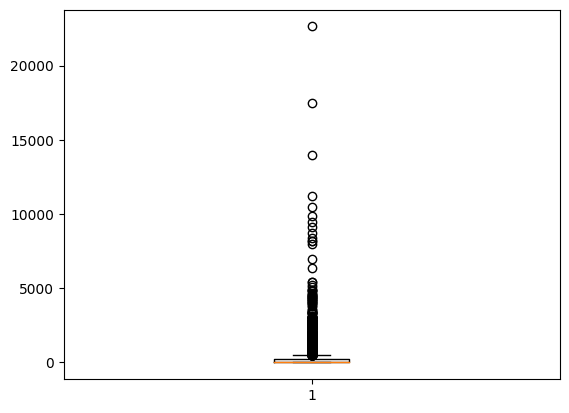

In [ ]:
# Cek Outlier Kolom Sales
plt.boxplot(df_super["Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d4cf88e1db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4cf88e22f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4cf88e1b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4cf88e2830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4cf88e2ad0>],
 'means': []}

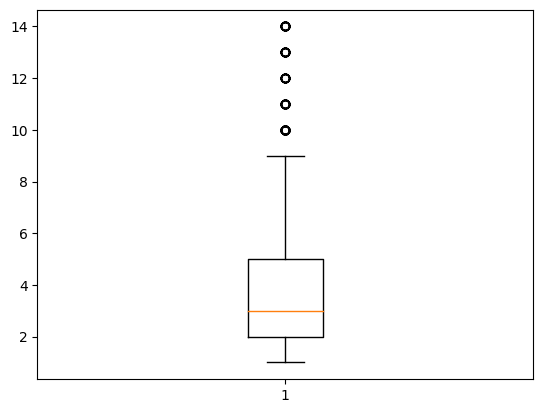

In [ ]:
# Cek Outlier Kolom Quantity
plt.boxplot(df_super["Quantity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d4cf8765420>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4cf8765960>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4cf8765180>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4cf8765ea0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4cf8766140>],
 'means': []}

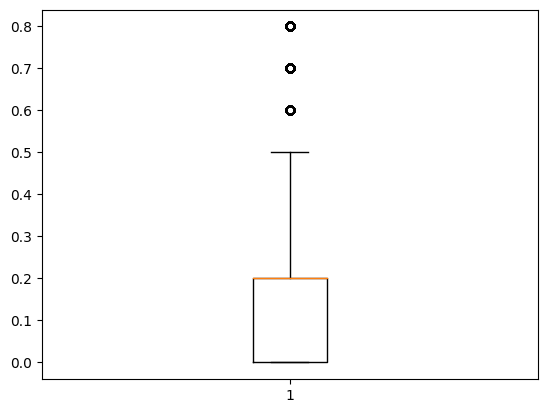

In [ ]:
# Cek Outlier Kolom Discount
plt.boxplot(df_super["Discount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7d4cf87d5cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4cf87d6200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4cf87d5a20>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4cf87d6740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4cf87d69e0>],
 'means': []}

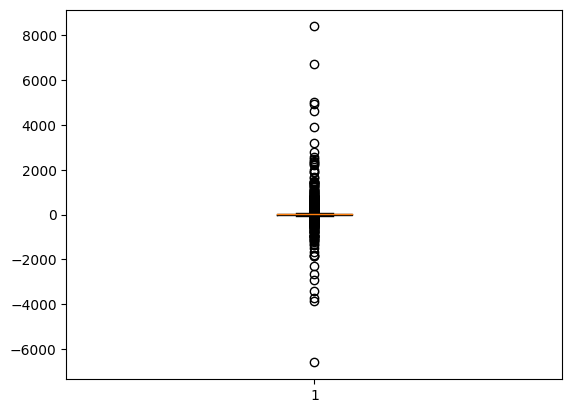

In [ ]:
# Cek Outlier Kolom Profit
plt.boxplot(df_super["Profit"])

In [ ]:
# Drop Kolom yang tidak diperlukan
df_super.drop(['Unnamed: 0', 'Order ID', 'Order Date', 'Ship Date','Customer ID','Country','Postal Code','Product ID'], axis=1, inplace=True)

In [ ]:
df_super.head()

,Row ID,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Segment Customer
0,1,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Segment High
1,2,Second Class,Claire Gute,Consumer,Henderson,Kentucky,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Segment High
2,3,Second Class,Darrin Van Huff,Corporate,Los Angeles,California,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Segment Low
3,4,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Segment High
4,5,Standard Class,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Segment Low


In [ ]:
# Data Encoding

x = df_super.drop(['Sales'], axis=1)
y = df_super['Segment Customer']


X1 = x.select_dtypes('O')

for col in X1.columns:
    lb = LabelEncoder()
    x[col] = lb.fit_transform(X1[col].values)
x

,Row ID,Ship Mode,Customer Name,Segment,City,State,Region,Category,Sub-Category,Product Name,Quantity,Discount,Profit,Segment Customer
0,1,2,166,0,194,15,2,0,4,386,2,0.00,41.9136,0
1,2,2,166,0,194,15,2,0,5,839,3,0.00,219.5820,0
2,3,2,201,1,266,3,3,1,10,1433,2,0.00,6.8714,1
3,4,3,687,0,153,8,2,0,16,366,5,0.45,-383.0310,0
4,5,3,687,0,153,8,2,1,14,573,2,0.20,2.5164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,2,758,0,295,8,2,0,9,1586,3,0.20,4.1028,2
9990,9991,3,202,0,104,3,3,0,9,1535,2,0.00,15.6332,2
9991,9992,3,202,0,104,3,3,2,13,47,2,0.20,19.3932,0
9992,9993,3,202,0,104,3,3,1,12,929,4,0.00,13.3200,2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [ ]:
# Cek Tipe Data
X_train.dtypes

Row ID                int64
Ship Mode             int64
Customer Name         int64
Segment               int64
City                  int64
State                 int64
Region                int64
Category              int64
Sub-Category          int64
Product Name          int64
Quantity              int64
Discount            float64
Profit              float64
Segment Customer      int64
dtype: object

In [ ]:
# Tentukan dictionary dengan hiperparameter untuk dicari
param_dist = {'n_neighbors': [8, 5, 4, 10, 9], 'metric': ['manhattan', 'euclidean']}

# Buat pengklasifikasi KNN dengan penyetelan hiperparameter menggunakan RandomizedSearchCV
# RandomizedSearchCV akan mencari kombinasi hiperparameter yang ditentukan
# menggunakan validasi silang (cv=5) dan mencoba 10 kombinasi secara acak (n_iter=10)
model1 = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist, n_iter=10, cv=5)

# Menyesuaikan model dengan data pelatihan
model1.fit(X_train, y_train)

# Mencetak hiperparameter terbaik yang ditemukan selama pencarian
print("Best Hyperparameters:", model1.best_params_)

# Menghitung skor akurasi model pada data pelatihan dan pengujian
train_score = model1.score(X_train, y_train)
test_score = model1.score(X_test, y_test)

# Mengembalikan nilai akurasi untuk data pelatihan dan pengujian
print('Akurasi:',train_score,test_score)


Best Hyperparameters: {'n_neighbors': 10, 'metric': 'manhattan'}
Akurasi: 0.60920613742495 0.4729891956782713
